In [25]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
sns.set_style('whitegrid')
%matplotlib inline
print("complete")

complete


In [26]:
from sklearn.datasets import load_boston

In [27]:
boston = load_boston()

In [28]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Text(0, 0.5, 'Number of houses')

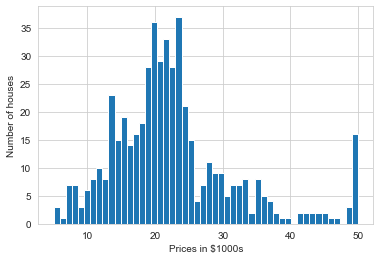

In [29]:
plt.hist(boston.target,bins=50)
plt.xlabel('Prices in $1000s')
plt.ylabel('Number of houses')

Text(0.5, 0, 'Number of rooms')

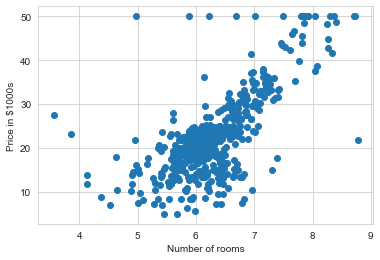

In [30]:
plt.scatter(boston.data[:,5],boston.target)
plt.ylabel('Price in $1000s')
plt.xlabel('Number of rooms')

In [31]:
boston_df = DataFrame(boston.data)
boston_df.columns = boston.feature_names
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [32]:
boston_df['Price'] = boston.target

/Users/yayoliak14/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


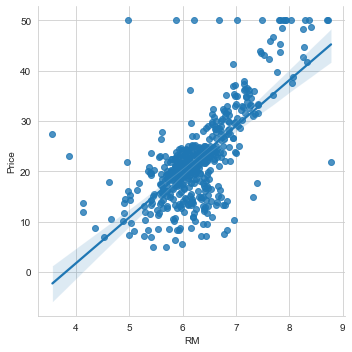

In [33]:
sns.lmplot('RM','Price',data=boston_df)

In [35]:
boston_df['MEDV'] = boston.target

/Users/yayoliak14/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


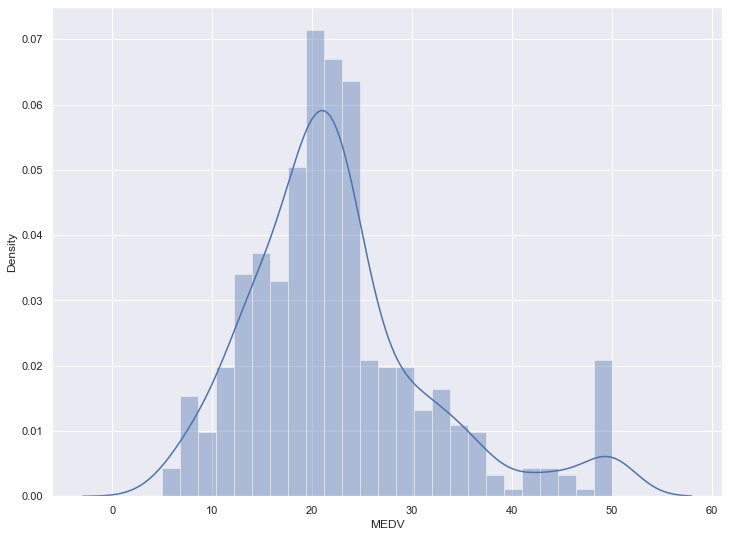

In [36]:
boston_df.isnull().sum()
sns.set(rc={'figure.figsize':(12,9)})
sns.distplot(boston_df['MEDV'], bins=25)
plt.show()

In [ ]:
X = np.vstack(boston_df.RM)

In [ ]:
X.shape

(506, 1)

In [ ]:
Y = boston_df.Price

In [ ]:
X

array([[array([6.575]), 1],
       [array([6.421]), 1],
       [array([7.185]), 1],
       ...,
       [array([6.976]), 1],
       [array([6.794]), 1],
       [array([6.03]), 1]], dtype=object)

In [ ]:
# [X 1]
X = np.array( [ [value,1] for value in X]   )

/var/folders/n2/nncp4h0d50v2ldjj1sv35ph00000gn/T/ipykernel_96140/2976916536.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array( [ [value,1] for value in X]   )


In [ ]:
X

array([[array([array([6.575]), 1], dtype=object), 1],
       [array([array([6.421]), 1], dtype=object), 1],
       [array([array([7.185]), 1], dtype=object), 1],
       ...,
       [array([array([6.976]), 1], dtype=object), 1],
       [array([array([6.794]), 1], dtype=object), 1],
       [array([array([6.03]), 1], dtype=object), 1]], dtype=object)

In [ ]:
m , b = np.linalg.lstsq(X,Y)[0]

/var/folders/n2/nncp4h0d50v2ldjj1sv35ph00000gn/T/ipykernel_96140/3172066473.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m , b = np.linalg.lstsq(X,Y)[0]


TypeError: No loop matching the specified signature and casting was found for ufunc lstsq_n

NameError: name 'm' is not defined

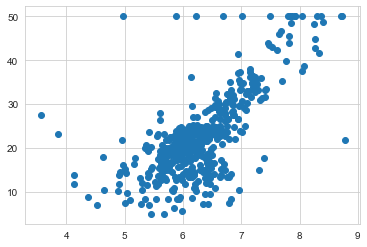

In [ ]:
plt.plot(boston_df.RM,boston_df.Price,'o')
x = boston_df.RM
plt.plot(x, m*x + b,'r',label='Best Fit Line')

In [ ]:
result = np.linalg.lstsq(X,Y)
error_total = result[1]
rmse = np.sqrt(error_total/len(X))
print ' The root mean square error was %.2f' %rmse

In [ ]:
#
lreg = LinearRegression()

In [ ]:
X_multi = boston_df.drop('Price',1)
Y_target = boston_df.Price

/var/folders/n2/nncp4h0d50v2ldjj1sv35ph00000gn/T/ipykernel_96140/282533246.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_multi = boston_df.drop('Price',1)


In [ ]:
lreg.fit(X_multi,Y_target)

LinearRegression()

In [ ]:
print ' The estimated intercept coefficient is  %.2f ' % lreg.intercept_

print ' The number of coefficients used was %d ' %len(lreg.coef_)

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(' The estimated intercept coefficient is  %.2f ' % lreg.intercept_)? (1385130095.py, line 1)

In [ ]:
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']
coeff_df['Coefficient Estimate'] = Series(lreg.coef_)
coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


In [ ]:
X_train,X_test,Y_train,Y_test = sklearn.cross_validation.train_test_split(X,boston_df.Price)

AttributeError: module 'sklearn' has no attribute 'cross_validation'

In [ ]:
print X_train.shape, X_test.shape , Y_train.shape , Y_test.shape

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(X_train.shape, X_test.shape , Y_train.shape , Y_test.shape)? (2863175663.py, line 1)

In [ ]:
lreg = LinearRegression()
lreg.fit(X_train,Y_train)

NameError: name 'X_train' is not defined

In [ ]:
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

NameError: name 'X_train' is not defined

In [ ]:
print " Fit a model X_train, and calculate the MSE with Y_train: %.2f " % np.mean((Y_train-pred_train)**2)
print " Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f " % np.mean((Y_test - pred_test)**2)

In [ ]:
train = plt.scatter(pred_train,(pred_train - Y_train),c='b',alpha=0.5)
test = plt.scatter(pred_test,(pred_test-Y_test),c='r',alpha=0.5)
plt.hlines(y=0,xmin=-10,xmax=40)
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')